In [20]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

In [21]:
# HIDDEN

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

### Error in the regression estimate
Though the average residual is 0, each individual residual is not. Some residuals might be quite far from 0. To get a sense of the amount of error in the regression estimate, we will start with a graphical description of the sense in which the regression line is the "best".

Our example is a dataset that has one point for every chapter of the novel "Little Women." The goal is to estimate the number of characters (that is, letters, punctuation marks, and so on) based on the number of periods. Recall that we attempted to do this in the very first lecture of this course.

In [22]:
little_women = Table.read_table('little_women.csv')
little_women.show(3)

Characters,Periods
21759,189
22148,188
20558,231


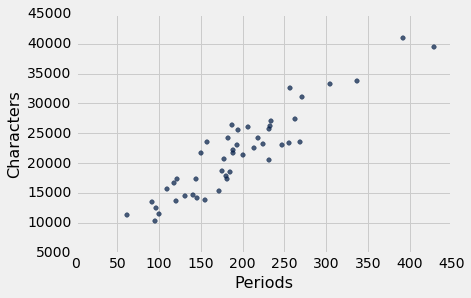

In [23]:
# One point for each chapter
# Horizontal axis: number of periods
# Vertical axis: number of characters (as in a, b, ", ?, etc; not people in the book)

little_women.scatter('Periods', 'Characters')

In [24]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

The scatter plot is remarkably close to linear, and the correlation is more than 0.92.

In [25]:
# HIDDEN

a = [131, 14431]
b = [231, 20558]
c = [392, 40935]
d = [157, 23524]
def lw_errors(slope, intercept):
    xlims = np.array([50, 450])
    little_women.scatter('Periods', 'Characters')
    plots.plot(xlims, slope*xlims + intercept, lw=2)
    plots.plot([a[0],a[0]], [a[1], slope*a[0] + intercept], color='r', lw=2)
    plots.plot([b[0],b[0]], [b[1], slope*b[0] + intercept], color='r', lw=2)
    plots.plot([c[0],c[0]], [c[1], slope*c[0] + intercept], color='r', lw=2)
    plots.plot([d[0],d[0]], [d[1], slope*d[0] + intercept], color='r', lw=2)

The figure below shows the scatter plot and regression line, with four of the errors marked in red.

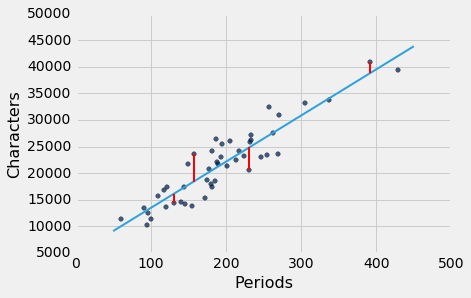

In [28]:
# Residuals: Deviations from the regression line

lw_errors(slope(little_women, 'Periods', 'Characters'), 
          intercept(little_women, 'Periods', 'Characters'))

Had we used a different line to create our estimates, the errors would have been different. The picture below shows how big the errors would be if we were to use a particularly silly line for estimation.

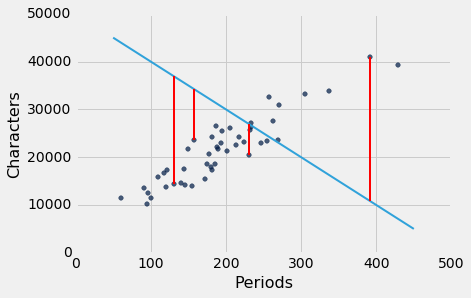

In [29]:
# Errors: Deviations from a different line

lw_errors(-100, 50000)

Below is a line that we have used before without saying that we were using a line to create estimates. It is the horizontal line at the value "average of $y$." Suppose you were asked to estimate $y$ and *were not told the value of $x$*; then you would use the average of $y$ as your estimate, regardless of the chapter. In other words, you would use the flat line below.

Each error that you would make would then be a deviation from average. The rough size of these deviations is the SD of $y$. 

In summary, if we use the flat line at the average of $y$ to make our estimates, the estimates will be off by the SD of $y$.

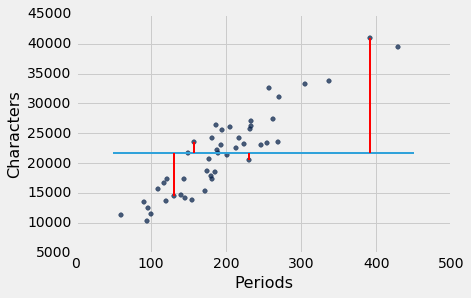

In [30]:
# Errors: Deviations from the flat line at the average of y

lw_errors(0, np.mean(little_women.column('Characters')))

### The Method of Least Squares
If you use any arbitrary line as your line of estimates, then some of your errors are likely to be positive and others negative. To avoid cancellation when measuring the rough size of the errors, we take the mean of the sqaured errors rather than the mean of the errors themselves. This is exactly analogous to our reason for looking at squared deviations from average, when we were learning how to calculate the SD.

The mean squared error of estimation using a straight line is a measure of roughly how big the squared errors are; taking the square root yields the root mean square error, which is in the same units as $y$.

Here is the second remarkable fact of mathematics in this section: the regression line minimizes the mean squared error of estimation (and hence also the root mean squared error) among all straight lines. That is why the regression line is sometimes called the "least squares line."

**Computing the "best" line.**

- To get estimates of $y$ based on $x$, you can use any line you want.
- Every line has a mean squared error of estimation.
- "Better" lines have smaller errors.
- **The regression line is the unique straight line that minimizes the mean squared error of estimation among all straight lines.**